In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import linalg as LA
import copy
import networkx as nx
import random
from scipy.stats import pearsonr

plt.rcParams.update({'font.size': 17})

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
"""
Read correlation matrix
The correlation matrix represents spearman correlation between every pair of genes in source and target tissue.
"""

corr_data = abs(pd.read_csv("./data/insulin_eQTL_spearman_corr_matrix_with_snap_removed_CF_lt_R_latest_10k_partial_cov.csv"))
#prob_data = pd.read_csv("../data/insulin_eQTL_spearman_prob_matrix_adj_removed_CF_lt_R_latest_10k.csv")
corr_data

,RPL10P15,CYP17A1,RP1-197B17.7,PHF24,GNG3,NPPA,SYCE1,RP11-286H14.4,RP11-187C18.3,RPL29P12,...,STX5.1,EIF5A.1,MAPK7.1,HIPK1.1,STK36.1,POMGNT1.1,RRS1.1,NDUFAF7.1,PIK3CD.1,CAP1.1
RPL10P15,1.000000,0.053434,0.043760,0.050054,0.035954,0.046822,0.035239,0.118408,0.005489,0.194413,...,0.000727,0.070111,0.073198,0.065885,0.031846,0.003094,0.060211,0.075776,0.047379,0.066268
CYP17A1,0.053434,1.000000,0.040780,0.010423,0.114900,0.010247,0.052217,0.036745,0.136705,0.172469,...,0.007358,0.125375,0.057436,0.041594,0.071905,0.098046,0.037525,0.060133,0.018366,0.050969
RP1-197B17.7,0.043760,0.040780,1.000000,0.053669,0.104990,0.109487,0.113065,0.001620,0.075315,0.003869,...,0.014127,0.099711,0.008239,0.014327,0.031850,0.113746,0.032206,0.144107,0.038195,0.176731
PHF24,0.050054,0.010423,0.053669,1.000000,0.238854,0.046769,0.065840,0.034841,0.051371,0.001902,...,0.024330,0.034334,0.037916,0.001487,0.014788,0.052408,0.046394,0.075549,0.013842,0.057242
GNG3,0.035954,0.114900,0.104990,0.238854,1.000000,0.013479,0.028680,0.068333,0.071739,0.024476,...,0.134748,0.007479,0.062852,0.035041,0.045977,0.070340,0.083501,0.060685,0.042746,0.014760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POMGNT1,0.003094,0.098046,0.113746,0.052408,0.070340,0.051227,0.018045,0.004307,0.041205,0.021201,...,0.065954,0.256484,0.084094,0.000366,0.009958,1.000000,0.096197,0.046823,0.042183,0.231971
RRS1,0.060211,0.037525,0.032206,0.046394,0.083501,0.061765,0.000168,0.039143,0.074213,0.052205,...,0.253314,0.187179,0.146618,0.049679,0.103293,0.096197,1.000000,0.007978,0.070975,0.027322
NDUFAF7,0.075776,0.060133,0.144107,0.075549,0.060685,0.022735,0.059743,0.046151,0.000834,0.062077,...,0.067235,0.044782,0.029135,0.063853,0.046101,0.046823,0.007978,1.000000,0.124829,0.166220
PIK3CD,0.047379,0.018366,0.038195,0.013842,0.042746,0.060825,0.068878,0.037072,0.063950,0.064314,...,0.000115,0.009649,0.080346,0.028597,0.069386,0.042183,0.070975,0.124829,1.000000,0.080262


In [3]:
"""
Get a glimpse of the data
"""

corr_data.describe()

,RPL10P15,CYP17A1,RP1-197B17.7,PHF24,GNG3,NPPA,SYCE1,RP11-286H14.4,RP11-187C18.3,RPL29P12,...,STX5.1,EIF5A.1,MAPK7.1,HIPK1.1,STK36.1,POMGNT1.1,RRS1.1,NDUFAF7.1,PIK3CD.1,CAP1.1
count,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,28918.000000,2.891800e+04,28918.000000,2.891800e+04,...,28918.000000,28918.000000,28918.000000,28918.000000,2.891800e+04,28918.000000,2.891800e+04,28918.000000,28918.000000,28918.000000
mean,0.053967,0.055251,0.054808,0.055630,0.054381,0.060164,0.051220,5.244513e-02,0.053810,5.368049e-02,...,0.063417,0.067700,0.060613,0.061018,6.184242e-02,0.071647,5.945467e-02,0.065466,0.063420,0.071660
std,0.044071,0.043225,0.041905,0.042285,0.040884,0.049843,0.039468,4.311632e-02,0.040657,4.402596e-02,...,0.051365,0.057085,0.047967,0.048201,4.914706e-02,0.058852,4.710629e-02,0.053265,0.050355,0.058320
min,0.000004,0.000002,0.000004,0.000001,0.000004,0.000001,0.000001,3.336212e-07,0.000003,3.336212e-07,...,0.000002,0.000001,0.000005,0.000002,3.336212e-07,0.000001,3.336212e-07,0.000003,0.000005,0.000004
25%,0.021027,0.021897,0.021756,0.022245,0.022310,0.023311,0.020337,2.034356e-02,0.021600,2.104533e-02,...,0.024399,0.025124,0.023646,0.023556,2.422240e-02,0.027123,2.311261e-02,0.024875,0.024962,0.027388
50%,0.044616,0.046771,0.046278,0.047026,0.046382,0.049254,0.043172,4.315724e-02,0.045926,4.403667e-02,...,0.051430,0.053829,0.050193,0.050614,5.138868e-02,0.057980,4.922415e-02,0.053298,0.052462,0.057968
75%,0.076484,0.079156,0.079093,0.079923,0.077923,0.085178,0.073812,7.405891e-02,0.077523,7.572769e-02,...,0.089863,0.094760,0.086409,0.086759,8.778126e-02,0.100942,8.493146e-02,0.092557,0.090016,0.101227
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000


In [4]:
"""
Read source and target genes and print their statistics
"""

N = int(corr_data.shape[0])
L = 2
n = int(N/L)

In [5]:
genes = list(corr_data.columns[:n])
target_genes = list(pd.read_csv('../data/insulin_target_genes_full.csv', header=None).iloc[:,0])
source_genes = list(pd.read_csv('../data/insulin_source_genes_full.csv', header=None).iloc[:,0])

print("Statistics of the ground truth data")
print("Number of genes: ", len(genes))
print("Number of target genes: ", len(target_genes))
print("Number of source genes: ", len(source_genes))
#print(genes)

common_target_genes = np.intersect1d(genes, target_genes)
common_source_genes = np.intersect1d(genes, source_genes)


print("Number of target genes present in the data: ", len(common_target_genes))
print("Number of source genes present in the data: ", len(common_source_genes))

target_genes_indices = [i for i, e in enumerate(genes) if e in common_target_genes]
source_genes_indices = [i for i, e in enumerate(genes) if e in common_source_genes]

print("Number of target genes present in the data: ", len(target_genes_indices))
print("Number of source genes present in the data: ", len(source_genes_indices))

print(target_genes_indices)

Statistics of the ground truth data
Number of genes:  14459
Number of target genes:  6482
Number of source genes:  2860
Number of target genes present in the data:  215
Number of source genes present in the data:  156
Number of target genes present in the data:  215
Number of source genes present in the data:  156
[5, 14, 1098, 1135, 1350, 1435, 1447, 1453, 1641, 1938, 2085, 2087, 2097, 2373, 2384, 2479, 2554, 2560, 2643, 2859, 2883, 3097, 3177, 3317, 3399, 3418, 3611, 3618, 3662, 3717, 3967, 4061, 4255, 4274, 4418, 4549, 4627, 4693, 5121, 5224, 5379, 5483, 5630, 5654, 5713, 6020, 6109, 6111, 6169, 6249, 6258, 6324, 6434, 6630, 6731, 6853, 6860, 6892, 6997, 7176, 7282, 7373, 7394, 7462, 7511, 7596, 7710, 7750, 7843, 7872, 7875, 8066, 8336, 8360, 8454, 8472, 8523, 8584, 8589, 8605, 8665, 8742, 8746, 8764, 8852, 8969, 9157, 9258, 9268, 9363, 9364, 9540, 9592, 9600, 9716, 9730, 9735, 9748, 9761, 9836, 9871, 9933, 10049, 10057, 10089, 10145, 10237, 10241, 10345, 10500, 10560, 10612, 10620,

In [6]:

SNAP_data = pd.read_csv("../data/SNAP_data/PPT-Ohmnet_gene_symbols.csv", index_col=0)
#SNAP_data
pancreas_df = SNAP_data.loc[SNAP_data['tissue'] == "pancreas"].values
skeletal_muscle_df = SNAP_data.loc[SNAP_data['tissue'] == "skeletal_muscle"].values

A_SNAP = np.zeros_like(corr_data.values, dtype=np.float32)

#skeletal_muscle_adjacency = np.zeros_like((np.shape(skeletal_muscle_df)[0], 2))
for i in range(np.shape(skeletal_muscle_df)[0]):
    n_offset = n
    try:
        from_gene = int(genes.index(skeletal_muscle_df[i,0])) + n_offset
        to_gene = int(genes.index(skeletal_muscle_df[i,1])) + n_offset    
        A_SNAP[from_gene, to_gene] = 1
        A_SNAP[to_gene, from_gene] = 1
    except:
        print("In skeletal muscle ", skeletal_muscle_df[i, 0], " or ", skeletal_muscle_df[i,1], " not present.")             
    

for i in range(np.shape(pancreas_df)[0]):
    n_offset = 0
    try:
        from_gene = int(genes.index(pancreas_df[i,0])) + n_offset
        to_gene = int(genes.index(pancreas_df[i,1])) + n_offset    
        A_SNAP[from_gene, to_gene] = 1
        A_SNAP[to_gene, from_gene] = 1
    except:
        print("In pancreas ", pancreas_df[i, 0], " or ", pancreas_df[i,1], " not present.")  


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In skeletal muscle  SETDB1  or  H4-16  not present.
In skeletal muscle  SEPTIN9  or  VAPB  not present.
In skeletal muscle  NKX3-2  or  TLE4  not present.
In skeletal muscle  MYOD1  or  RUNX1  not present.
In skeletal muscle  NPM1  or  ATP5F1A  not present.
In skeletal muscle  MRE11  or  FEN1  not present.
In skeletal muscle  RBPMS  or  TENT2  not present.
In skeletal muscle  ATP5F1D  or  ATP5F1C  not present.
In skeletal muscle  PPP1CA  or  PRKACG  not present.
In skeletal muscle  GCK  or  GMIP  not present.
In skeletal muscle  ERCC4  or  H2AX  not present.
In skeletal muscle  TLE5  or  RNF31  not present.
In skeletal muscle  GRB2  or  DENND2B  not present.
In skeletal muscle  FOXA3  or  DSP  not present.
In skeletal muscle  H4-16  or  KDM4A  not present.
In skeletal muscle  OBSL1  or  MRE11  not present.
In skeletal muscle  CREB3  or  BIK  not present.
In skeletal muscle  ACTN3  or  LHX3  not present.
In skeletal muscle  PRKN  or  EPS15  not present.
In skeletal muscle  PRKN  or  NME

In skeletal muscle  ECPAS  or  KIF1B  not present.
In skeletal muscle  HDAC5  or  H4C3  not present.
In skeletal muscle  FYN  or  PAX7  not present.
In skeletal muscle  COPS5  or  H4C3  not present.
In skeletal muscle  ATP5MG  or  ATP5MF  not present.
In skeletal muscle  CAND1  or  H4C11  not present.
In skeletal muscle  RNF2  or  WASHC1  not present.
In skeletal muscle  NCK1  or  PAX3  not present.
In skeletal muscle  H4C1  or  CUL1  not present.
In skeletal muscle  MTOR  or  PRKN  not present.
In skeletal muscle  TUBG1  or  H4C8  not present.
In skeletal muscle  YWHAE  or  TGFB1  not present.
In skeletal muscle  P2RX2  or  P2RX2  not present.
In skeletal muscle  MAP3K3  or  H4C1  not present.
In skeletal muscle  HSPB1  or  PRKACG  not present.
In skeletal muscle  H4-16  or  HSPA5  not present.
In skeletal muscle  UCHL5  or  H4C4  not present.
In skeletal muscle  TSG101  or  WARS1  not present.
In skeletal muscle  EP300  or  PRKN  not present.
In skeletal muscle  DAXX  or  H4C5  not p

In skeletal muscle  RB1CC1  or  NSD3  not present.
In skeletal muscle  PFKM  or  CAV3  not present.
In skeletal muscle  ECPAS  or  MARCHF5  not present.
In skeletal muscle  NASP  or  H4C1  not present.
In skeletal muscle  MAPK1  or  GATA4  not present.
In skeletal muscle  MAP3K1  or  H4C5  not present.
In skeletal muscle  EGFR  or  ATP5PB  not present.
In skeletal muscle  PIK3CA  or  ATP5IF1  not present.
In skeletal muscle  NPHP1  or  DNAAF10  not present.
In skeletal muscle  TLE5  or  TCF7L2  not present.
In skeletal muscle  PRKN  or  STUB1  not present.
In skeletal muscle  APP  or  ATP5PO  not present.
In skeletal muscle  PGAM2  or  MDM2  not present.
In skeletal muscle  ATP6V0D1  or  ATP5PO  not present.
In skeletal muscle  PRKN  or  TUBG1  not present.
In skeletal muscle  H2AX  or  NHEJ1  not present.
In skeletal muscle  H2AX  or  PRDX3  not present.
In skeletal muscle  H2AX  or  S100A4  not present.
In skeletal muscle  HDAC5  or  ATP5F1A  not present.
In skeletal muscle  H2AX  or

In skeletal muscle  HDAC2  or  BRCA2  not present.
In skeletal muscle  SEM1  or  PSMD10  not present.
In skeletal muscle  TP53  or  H2AX  not present.
In skeletal muscle  ARRB1  or  H4C12  not present.
In skeletal muscle  HSPA9  or  PRKN  not present.
In skeletal muscle  H4C3  or  KDM4A  not present.
In skeletal muscle  TNRC6A  or  A1CF  not present.
In skeletal muscle  MARCHF6  or  SHC1  not present.
In skeletal muscle  FOS  or  PRKACG  not present.
In skeletal muscle  MCM2  or  H4-16  not present.
In skeletal muscle  CLN3  or  ATP5MG  not present.
In skeletal muscle  YBX1  or  ATP5F1A  not present.
In skeletal muscle  HDAC1  or  H4C15  not present.
In skeletal muscle  GBA  or  PRKN  not present.
In skeletal muscle  EHD1  or  WARS1  not present.
In skeletal muscle  ATP5F1D  or  DDOST  not present.
In skeletal muscle  MYOD1  or  NCOR2  not present.
In skeletal muscle  PRKN  or  PSMD10  not present.
In skeletal muscle  MRPL58  or  ATP5F1B  not present.
In skeletal muscle  H2AX  or  EGFR

In skeletal muscle  FZR1  or  PRKN  not present.
In skeletal muscle  USH1C  or  USH1C  not present.
In skeletal muscle  HDAC6  or  H4-16  not present.
In skeletal muscle  EGFR  or  ATP5F1B  not present.
In skeletal muscle  FN1  or  IGF2BP1  not present.
In skeletal muscle  KMT5A  or  H4C5  not present.
In skeletal muscle  NF2  or  PRKACG  not present.
In skeletal muscle  ELAVL1  or  MARCHF6  not present.
In skeletal muscle  ATP5PO  or  TRIP6  not present.
In skeletal muscle  CDKN1A  or  ATP5F1B  not present.
In skeletal muscle  KDM4A  or  H4C1  not present.
In skeletal muscle  UBASH3A  or  DTX3  not present.
In skeletal muscle  SEM1  or  EEF1G  not present.
In skeletal muscle  PICK1  or  ATP5IF1  not present.
In skeletal muscle  IGF2BP1  or  RPS27L  not present.
In skeletal muscle  WWOX  or  PLSCR3  not present.
In skeletal muscle  ATP5PO  or  NDUFS4  not present.
In skeletal muscle  INSR  or  CAV3  not present.
In skeletal muscle  FN1  or  ATP5F1A  not present.
In skeletal muscle  PRK

In skeletal muscle  HDAC6  or  H4C4  not present.
In skeletal muscle  PRMT5  or  ATP5F1C  not present.
In skeletal muscle  STUB1  or  DNAAF4  not present.
In skeletal muscle  MCM2  or  H4C15  not present.
In skeletal muscle  PTPA  or  H2AX  not present.
In skeletal muscle  TRAF3  or  STING1  not present.
In skeletal muscle  USP15  or  PGAM2  not present.
In skeletal muscle  BRD7  or  H4C14  not present.
In skeletal muscle  SH2D1A  or  LHX3  not present.
In skeletal muscle  CTNND1  or  CDH3  not present.
In skeletal muscle  DHRS2  or  NPM1  not present.
In skeletal muscle  PPM1D  or  NSD3  not present.
In skeletal muscle  VDAC1  or  ATP5F1B  not present.
In skeletal muscle  TAFAZZIN  or  CSNK1E  not present.
In skeletal muscle  PPARGC1A  or  MYOD1  not present.
In skeletal muscle  CTNNB1  or  PRKN  not present.
In skeletal muscle  HSPB1  or  ECPAS  not present.
In skeletal muscle  RP2  or  ECPAS  not present.
In skeletal muscle  ZACN  or  TRPM7  not present.
In skeletal muscle  TRIM32  

In skeletal muscle  PRKN  or  RUVBL1  not present.
In skeletal muscle  PSME3  or  ATP5F1B  not present.
In skeletal muscle  P2RY12  or  ATP5PB  not present.
In skeletal muscle  PRKN  or  VDAC1  not present.
In skeletal muscle  H4C5  or  SMARCA5  not present.
In skeletal muscle  BIK  or  TANK  not present.
In skeletal muscle  ATP5F1A  or  ATP5ME  not present.
In skeletal muscle  KAT14  or  H4C1  not present.
In skeletal muscle  ATP5ME  or  ATP5IF1  not present.
In skeletal muscle  RPS6KA5  or  CTNNA3  not present.
In skeletal muscle  PRKN  or  YWHAE  not present.
In skeletal muscle  MRE11  or  SFPQ  not present.
In skeletal muscle  DMAP1  or  H2AX  not present.
In skeletal muscle  SEM1  or  PSMC4  not present.
In skeletal muscle  IPO11  or  AARS1  not present.
In skeletal muscle  PRKACG  or  PSEN1  not present.
In skeletal muscle  H2AX  or  KAT2A  not present.
In skeletal muscle  ATP5PO  or  MTCH1  not present.
In skeletal muscle  SEM1  or  UBR1  not present.
In skeletal muscle  ACTN3  

In skeletal muscle  CUL3  or  H4C14  not present.
In skeletal muscle  TLE5  or  PITX1  not present.
In skeletal muscle  ATR  or  BRCA2  not present.
In skeletal muscle  MARCHF5  or  CCNB1  not present.
In skeletal muscle  RB1  or  H4-16  not present.
In skeletal muscle  COPRS  or  H4C11  not present.
In skeletal muscle  CAND1  or  H4C1  not present.
In skeletal muscle  UBE2K  or  CBLC  not present.
In skeletal muscle  KDM1A  or  NSD2  not present.
In skeletal muscle  IGF2BP1  or  SCYL2  not present.
In skeletal muscle  MARCHF5  or  UBE2E3  not present.
In skeletal muscle  MAP3K3  or  H4C4  not present.
In skeletal muscle  BRCA1  or  H4C1  not present.
In skeletal muscle  MED4  or  ATP5PB  not present.
In skeletal muscle  ATP5PB  or  TOMM20  not present.
In skeletal muscle  PRKN  or  MARCHF5  not present.
In skeletal muscle  SMC1A  or  SYCP3  not present.
In skeletal muscle  NCOA3  or  H4-16  not present.
In skeletal muscle  TENT4B  or  TOMM22  not present.
In skeletal muscle  GATA4  or

In skeletal muscle  ATL3  or  ATP5F1E  not present.
In skeletal muscle  PRKN  or  YWHAH  not present.
In skeletal muscle  USF1  or  ATP5PD  not present.
In skeletal muscle  PRKN  or  REL  not present.
In skeletal muscle  SKI  or  ATP5F1A  not present.
In skeletal muscle  PRKN  or  RAD1  not present.
In skeletal muscle  CCN2  or  TGFB3  not present.
In skeletal muscle  IGF2BP1  or  SF3B1  not present.
In skeletal muscle  POGZ  or  A1CF  not present.
In skeletal muscle  GNAS  or  CAV3  not present.
In skeletal muscle  COPRS  or  H4C12  not present.
In skeletal muscle  CDK2  or  ATP5F1D  not present.
In skeletal muscle  FOXE1  or  RCC1  not present.
In skeletal muscle  MRTFB  or  SRF  not present.
In skeletal muscle  MCM4  or  H4C6  not present.
In skeletal muscle  HSP90AA1  or  MYOD1  not present.
In skeletal muscle  BRCA1  or  H4C8  not present.
In skeletal muscle  BRCA2  or  BABAM2  not present.
In skeletal muscle  PRKN  or  HNRNPU  not present.
In skeletal muscle  TRAF2  or  PALS1  no

In skeletal muscle  LHX3  or  CDC23  not present.
In skeletal muscle  SHC1  or  KRT9  not present.
In skeletal muscle  IGF2BP1  or  RPS6  not present.
In skeletal muscle  SYNCRIP  or  A1CF  not present.
In skeletal muscle  PPP1CB  or  DENND2B  not present.
In skeletal muscle  NKX3-2  or  RBBP7  not present.
In skeletal muscle  BCL2L1  or  BIK  not present.
In skeletal muscle  TLE5  or  HGS  not present.
In skeletal muscle  MARCHF2  or  UBE2D1  not present.
In skeletal muscle  ATP1A1  or  ATP5MG  not present.
In skeletal muscle  TLE5  or  GIGYF1  not present.
In skeletal muscle  COPS5  or  H4C14  not present.
In skeletal muscle  CLDN3  or  TJP1  not present.
In skeletal muscle  ATP5F1A  or  PABPC1  not present.
In skeletal muscle  RXRA  or  MYOD1  not present.
In skeletal muscle  FYN  or  BRCA2  not present.
In skeletal muscle  NRG1  or  LEMD3  not present.
In skeletal muscle  SUMO1  or  PRKN  not present.
In skeletal muscle  EP300  or  ALX1  not present.
In skeletal muscle  HDAC1  or  

In skeletal muscle  BIK  or  APP  not present.
In skeletal muscle  INTS9  or  BRCA2  not present.
In skeletal muscle  WWTR1  or  PAX3  not present.
In skeletal muscle  SEPTIN5  or  PFN2  not present.
In skeletal muscle  SMAD7  or  MYOD1  not present.
In skeletal muscle  USP11  or  MRE11  not present.
In skeletal muscle  COPRS  or  H4C4  not present.
In skeletal muscle  ECPAS  or  RPS26  not present.
In skeletal muscle  SLC9A2  or  RASA1  not present.
In skeletal muscle  SEM1  or  TRIM33  not present.
In skeletal muscle  AGO4  or  ATP5F1C  not present.
In skeletal muscle  CDK2  or  ATP5PB  not present.
In skeletal muscle  ATP5F1B  or  PHB  not present.
In skeletal muscle  STAB2  or  SUMO1  not present.
In skeletal muscle  CDH23  or  USH1C  not present.
In skeletal muscle  PRKN  or  RHOT2  not present.
In skeletal muscle  VDAC1  or  ATP5F1A  not present.
In skeletal muscle  DNAAF4  or  NCK2  not present.
In skeletal muscle  PRKN  or  PRPF19  not present.
In skeletal muscle  PRKACG  or  C

In skeletal muscle  CBX8  or  H4-16  not present.
In skeletal muscle  ATP5PB  or  VDAC3  not present.
In skeletal muscle  IGF2BP1  or  RPS3  not present.
In skeletal muscle  AARS1  or  EIF4A3  not present.
In skeletal muscle  ICOSLG  or  KAT6B  not present.
In skeletal muscle  H4-16  or  SMARCA5  not present.
In skeletal muscle  MAP3K3  or  H4C3  not present.
In skeletal muscle  LAMTOR5  or  TGFB1  not present.
In skeletal muscle  MCM2  or  H4C12  not present.
In skeletal muscle  SUZ12  or  ATP5F1B  not present.
In skeletal muscle  MYOD1  or  EP300  not present.
In skeletal muscle  H2AX  or  HSPA1A  not present.
In skeletal muscle  H4C9  or  SMARCA5  not present.
In skeletal muscle  SEM1  or  UBE3A  not present.
In skeletal muscle  EP300  or  MRE11  not present.
In skeletal muscle  COPRS  or  H4C6  not present.
In skeletal muscle  ATP5F1A  or  RPS15A  not present.
In skeletal muscle  PRMT7  or  H4C1  not present.
In skeletal muscle  TRA2A  or  TWNK  not present.
In skeletal muscle  ATP

In skeletal muscle  BIK  or  INSIG2  not present.
In skeletal muscle  FOXP1  or  TWNK  not present.
In skeletal muscle  MYOD1  or  PRMT5  not present.
In skeletal muscle  PTPRR  or  MAPK14  not present.
In skeletal muscle  ARRB1  or  H4C14  not present.
In skeletal muscle  SHC1  or  ELP1  not present.
In skeletal muscle  KMT5A  or  H4-16  not present.
In skeletal muscle  FOXE1  or  MECP2  not present.
In skeletal muscle  BRD7  or  H4C15  not present.
In skeletal muscle  CEP57  or  ATP5F1C  not present.
In skeletal muscle  HDAC5  or  H4C8  not present.
In skeletal muscle  BRCA1  or  MRE11  not present.
In skeletal muscle  TLE2  or  BARHL1  not present.
In skeletal muscle  ATP5F1D  or  ATP6V0D1  not present.
In skeletal muscle  UBE3A  or  KRT9  not present.
In skeletal muscle  CAV3  or  PTGES3  not present.
In skeletal muscle  BRD7  or  H4C3  not present.
In skeletal muscle  CALM1  or  CASP8AP2  not present.
In skeletal muscle  TLE5  or  TRIP6  not present.
In skeletal muscle  SOX8  or  

In skeletal muscle  H4C12  or  SMARCA5  not present.
In skeletal muscle  MRE11  or  RNF8  not present.
In skeletal muscle  ATP5PD  or  ATP5F1C  not present.
In skeletal muscle  TLE5  or  NCDN  not present.
In skeletal muscle  MDM2  or  DHRS2  not present.
In skeletal muscle  WARS1  or  GTF2I  not present.
In skeletal muscle  CBX8  or  IGF2BP1  not present.
In skeletal muscle  ACO2  or  ATP5PB  not present.
In skeletal muscle  MYC  or  CCN1  not present.
In skeletal muscle  BIK  or  TMEM97  not present.
In skeletal muscle  FOXA3  or  STAT1  not present.
In skeletal muscle  CREBBP  or  MYOD1  not present.
In skeletal muscle  DAXX  or  H4-16  not present.
In skeletal muscle  MAP3K3  or  H4C2  not present.
In skeletal muscle  DHRS2  or  RPS13  not present.
In skeletal muscle  ATP5PB  or  ATP5F1D  not present.
In skeletal muscle  BCL2L1  or  PRKN  not present.
In skeletal muscle  SLC4A1  or  SLC4A1  not present.
In skeletal muscle  COPS5  or  H4C1  not present.
In skeletal muscle  CASP8  or

In skeletal muscle  PCTP  or  PAX3  not present.
In skeletal muscle  MARCHF6  or  UBE2G1  not present.
In skeletal muscle  HNRNPA1  or  PRKACG  not present.
In skeletal muscle  RTCB  or  ECPAS  not present.
In skeletal muscle  RBBP8  or  MRE11  not present.
In skeletal muscle  ATP5F1A  or  RPS19  not present.
In skeletal muscle  BIK  or  ALG8  not present.
In skeletal muscle  RACK1  or  ATP5F1A  not present.
In skeletal muscle  FBXW11  or  WARS1  not present.
In skeletal muscle  ARRB1  or  DHRS2  not present.
In skeletal muscle  ACADM  or  ATP5F1C  not present.
In skeletal muscle  PRKN  or  TUBB  not present.
In skeletal muscle  MARK2  or  CERT1  not present.
In skeletal muscle  PLA2G3  or  PVR  not present.
In skeletal muscle  TLE5  or  TEAD4  not present.
In skeletal muscle  ECM1  or  A1CF  not present.
In skeletal muscle  SH2B2  or  GRB2  not present.
In skeletal muscle  GDNF  or  RET  not present.
In skeletal muscle  ATP5F1C  or  POLA2  not present.
In skeletal muscle  AARS1  or  W

In skeletal muscle  TINF2  or  MRE11  not present.
In skeletal muscle  HSPA4  or  PRKN  not present.
In skeletal muscle  SGPL1  or  ATP5MG  not present.
In skeletal muscle  CETP  or  PRKACG  not present.
In skeletal muscle  PTPRR  or  PTPRR  not present.
In skeletal muscle  SEM1  or  BAG6  not present.
In skeletal muscle  VHL  or  H4-16  not present.
In skeletal muscle  ATP5F1B  or  OXA1L  not present.
In skeletal muscle  TGFB1  or  THBS1  not present.
In skeletal muscle  STING1  or  IRAK1  not present.
In skeletal muscle  MED4  or  MESD  not present.
In skeletal muscle  TRAP1  or  NRG1  not present.
In skeletal muscle  GSK3B  or  IGF2BP1  not present.
In skeletal muscle  PTEN  or  ATP5F1A  not present.
In skeletal muscle  TAFAZZIN  or  LRP6  not present.
In skeletal muscle  MEIS1  or  MYOD1  not present.
In skeletal muscle  COPS5  or  IGF2BP1  not present.
In skeletal muscle  MARCHF8  or  UBE2D1  not present.
In skeletal muscle  ATP5F1B  or  ATP5ME  not present.
In skeletal muscle  HA

In pancreas  CEP57  or  H4C8  not present.
In pancreas  ECPAS  or  IKBKG  not present.
In pancreas  CCNB1  or  SLC27A2  not present.
In pancreas  TRAF2  or  PRKN  not present.
In pancreas  EEF1A2  or  H2AX  not present.
In pancreas  ARRB1  or  H4C4  not present.
In pancreas  TNFRSF1A  or  H4C2  not present.
In pancreas  SEM1  or  UBQLN1  not present.
In pancreas  RAB27B  or  SYTL2  not present.
In pancreas  PRKN  or  GSDMA  not present.
In pancreas  PIH1D1  or  DNAAF10  not present.
In pancreas  STN1  or  MED17  not present.
In pancreas  HNF4A  or  SIRT1  not present.
In pancreas  STOM  or  PRKACG  not present.
In pancreas  ATP5PO  or  ATP5PB  not present.
In pancreas  TAFAZZIN  or  LRP5  not present.
In pancreas  NEUROD1  or  CALM2  not present.
In pancreas  BRCA2  or  BRCC3  not present.
In pancreas  ATP5F1C  or  NDUFA12  not present.
In pancreas  STN1  or  MED30  not present.
In pancreas  MRE11  or  TJP1  not present.
In pancreas  RAB3B  or  CALM1  not present.
In pancreas  MYH9  or

In pancreas  NCK1  or  CCKBR  not present.
In pancreas  BNIP1  or  MARCHF5  not present.
In pancreas  TERT  or  ACAA2  not present.
In pancreas  CTSE  or  CTSE  not present.
In pancreas  PPT1  or  ATP5F1B  not present.
In pancreas  SEM1  or  VCP  not present.
In pancreas  TERT  or  USF2  not present.
In pancreas  ALYREF  or  LUC7L3  not present.
In pancreas  FSCN1  or  SEPTIN11  not present.
In pancreas  MESD  or  KPNB1  not present.
In pancreas  LIMK1  or  PRKN  not present.
In pancreas  STING1  or  NPC1  not present.
In pancreas  ISL1  or  LHX4  not present.
In pancreas  ALYREF  or  SRSF6  not present.
In pancreas  MCM2  or  H4C13  not present.
In pancreas  ZNF24  or  YJU2B  not present.
In pancreas  PTPRR  or  MAPK7  not present.
In pancreas  ATP5PB  or  TOMM22  not present.
In pancreas  MARCHF8  or  UBE2D3  not present.
In pancreas  NSD3  or  SMARCA4  not present.
In pancreas  BABAM2  or  BRCC3  not present.
In pancreas  PAWR  or  ATP5F1C  not present.
In pancreas  MED4  or  ATP5IF

In pancreas  PRKN  or  CDK5  not present.
In pancreas  TLE5  or  OXER1  not present.
In pancreas  MST1  or  MST1  not present.
In pancreas  H2AX  or  PRDX6  not present.
In pancreas  KDM3A  or  ECPAS  not present.
In pancreas  PRKN  or  RPS19  not present.
In pancreas  H4C14  or  RBBP7  not present.
In pancreas  AKTIP  or  FHIP1B  not present.
In pancreas  VDAC3  or  ATP5F1B  not present.
In pancreas  ATF2  or  ATP5F1C  not present.
In pancreas  HDAC6  or  H4C6  not present.
In pancreas  VAV2  or  BRDT  not present.
In pancreas  NRF1  or  LHX3  not present.
In pancreas  SEM1  or  PSMD14  not present.
In pancreas  FBXO6  or  ATP5F1B  not present.
In pancreas  ADD1  or  PRKACG  not present.
In pancreas  PRMT1  or  H4-16  not present.
In pancreas  KMT5A  or  H4C13  not present.
In pancreas  POT1  or  STN1  not present.
In pancreas  ATP5F1A  or  TNFRSF1A  not present.
In pancreas  YJU2B  or  JUP  not present.
In pancreas  H2AX  or  YBX3  not present.
In pancreas  GATA4  or  HDAC2  not pres

In pancreas  BIK  or  BNIP3  not present.
In pancreas  SEPTIN11  or  SEPTIN5  not present.
In pancreas  HSF1  or  AARS1  not present.
In pancreas  ATP5F1C  or  SSBP1  not present.
In pancreas  MEN1  or  H4-16  not present.
In pancreas  CLDN3  or  GRB2  not present.
In pancreas  STN1  or  APP  not present.
In pancreas  BCL11A  or  SUMO1  not present.
In pancreas  ENG  or  TGFB1  not present.
In pancreas  PGAM2  or  TXN  not present.
In pancreas  EEF1D  or  ALX1  not present.
In pancreas  KCNK16  or  HMGCR  not present.
In pancreas  GRB2  or  H4C6  not present.
In pancreas  PTBP1  or  ATP5F1C  not present.
In pancreas  ATP5PD  or  APP  not present.
In pancreas  RRAS2  or  RASGRF1  not present.
In pancreas  H4-16  or  NPM1  not present.
In pancreas  HDAC1  or  H4C3  not present.
In pancreas  L3MBTL1  or  H4C6  not present.
In pancreas  PRKN  or  CCNB1  not present.
In pancreas  CUL4B  or  TUT4  not present.
In pancreas  GLP1R  or  CALM2  not present.
In pancreas  DNAJB9  or  ECPAS  not pr

In pancreas  H4C13  or  SMARCA5  not present.
In pancreas  RAD23B  or  ECPAS  not present.
In pancreas  HNRNPA1  or  ALYREF  not present.
In pancreas  NASP  or  H4C6  not present.
In pancreas  MED4  or  ATP5PD  not present.
In pancreas  YWHAG  or  ATP5F1A  not present.
In pancreas  H4C15  or  TNFRSF1A  not present.
In pancreas  PCM1  or  ATP5MG  not present.
In pancreas  PRKN  or  YBX3  not present.
In pancreas  IQCB1  or  KRT9  not present.
In pancreas  NKX3-2  or  TLE2  not present.
In pancreas  TLE5  or  SNCAIP  not present.
In pancreas  BAZ1B  or  H2AX  not present.
In pancreas  TRRAP  or  MRE11  not present.
In pancreas  BRD7  or  H4C1  not present.
In pancreas  TGFB1  or  SNAI1  not present.
In pancreas  MRTFA  or  SMAD3  not present.
In pancreas  COPS5  or  H4-16  not present.
In pancreas  DAXX  or  H4C12  not present.
In pancreas  OBSL1  or  H4C13  not present.
In pancreas  ATP5MG  or  MYH9  not present.
In pancreas  DHX9  or  MRE11  not present.
In pancreas  PRKN  or  LMNA  no

In pancreas  PAXIP1  or  ALYREF  not present.
In pancreas  TGFB1  or  FEM1B  not present.
In pancreas  TLE5  or  HNF1A  not present.
In pancreas  SEM1  or  RAD23B  not present.
In pancreas  CDK1  or  H4C1  not present.
In pancreas  TAFAZZIN  or  HSPD1  not present.
In pancreas  H4-16  or  ORC4  not present.
In pancreas  PRKN  or  MCM7  not present.
In pancreas  GRB2  or  H4C15  not present.
In pancreas  CDC16  or  ATP5PF  not present.
In pancreas  HDAC5  or  H4C6  not present.
In pancreas  UBE2I  or  H4C1  not present.
In pancreas  H4C1  or  MCM6  not present.
In pancreas  FOXA3  or  MCM4  not present.
In pancreas  RNF2  or  ALYREF  not present.
In pancreas  H2AX  or  HNRNPAB  not present.
In pancreas  ECPAS  or  HNRNPH1  not present.
In pancreas  PRKN  or  RPS14  not present.
In pancreas  NCOA2  or  H4-16  not present.
In pancreas  AHSA1  or  ATP5F1C  not present.
In pancreas  SLC4A1  or  CLU  not present.
In pancreas  SGO1  or  SET  not present.
In pancreas  RUVBL1  or  H2AX  not pre

In pancreas  ATP5PB  or  SDHA  not present.
In pancreas  TLE5  or  PICK1  not present.
In pancreas  CDX2  or  MAPK1  not present.
In pancreas  MFN2  or  MARCHF5  not present.
In pancreas  H4C1  or  PRMT3  not present.
In pancreas  ALDOA  or  ATP5PF  not present.
In pancreas  ALDOA  or  PGAM2  not present.
In pancreas  ELP3  or  ELP1  not present.
In pancreas  BBS1  or  PAX2  not present.
In pancreas  ID2  or  GATA4  not present.
In pancreas  PRKN  or  HNRNPM  not present.
In pancreas  MAPK1  or  HNF4A  not present.
In pancreas  H4C6  or  HDAC9  not present.
In pancreas  PRKN  or  CASP8  not present.
In pancreas  BMI1  or  ATP5F1B  not present.
In pancreas  RNF168  or  ECPAS  not present.
In pancreas  H4C2  or  KDM4A  not present.
In pancreas  UBE2I  or  NSD3  not present.
In pancreas  HNF4A  or  MED24  not present.
In pancreas  ATP5F1A  or  RELA  not present.
In pancreas  RNF2  or  ATP5F1B  not present.
In pancreas  ATP5PF  or  FABP5  not present.
In pancreas  GATA6  or  HNF4A  not pre

In pancreas  CCN2  or  ITGA5  not present.
In pancreas  VPS28  or  BRCA2  not present.
In pancreas  WARS1  or  CDC34  not present.
In pancreas  TAFAZZIN  or  COL18A1  not present.
In pancreas  CNTROB  or  CCN1  not present.
In pancreas  MRTFA  or  SUMO1  not present.
In pancreas  LIN7C  or  PALS1  not present.
In pancreas  PRKN  or  EEF1A2  not present.
In pancreas  EN1  or  JUN  not present.
In pancreas  L3MBTL1  or  H4C1  not present.
In pancreas  ELP1  or  CHUK  not present.
In pancreas  ZC3H3  or  TENT4B  not present.
In pancreas  PRKN  or  RAC1  not present.
In pancreas  RNF20  or  H4C14  not present.
In pancreas  FOXE1  or  PSIP1  not present.
In pancreas  STK4  or  H2AX  not present.
In pancreas  PARP1  or  MRE11  not present.
In pancreas  PRKN  or  PRKN  not present.
In pancreas  ATP5F1C  or  ATP5IF1  not present.
In pancreas  CASR  or  CHD8  not present.
In pancreas  SRPK2  or  RASGRF1  not present.
In pancreas  FOXA3  or  AKAP8  not present.
In pancreas  PRKDC  or  MRE11  not

In pancreas  CEBPB  or  PRKACG  not present.
In pancreas  ATP5PB  or  ATP5F1B  not present.
In pancreas  PPP1R9B  or  CCKBR  not present.
In pancreas  BRD7  or  H4C12  not present.
In pancreas  CUL3  or  H4C9  not present.
In pancreas  MCM2  or  ATP5F1B  not present.
In pancreas  H2AX  or  TRAP1  not present.
In pancreas  ALYREF  or  NCBP1  not present.
In pancreas  ATP5F1C  or  RPS6  not present.
In pancreas  H4C9  or  BPTF  not present.
In pancreas  ECPAS  or  CEP152  not present.
In pancreas  RAB3B  or  CALM2  not present.
In pancreas  JUND  or  TERT  not present.
In pancreas  WARS1  or  DNMT3B  not present.
In pancreas  WDR83  or  EXO1  not present.
In pancreas  GRB2  or  H4-16  not present.
In pancreas  ATM  or  NSD3  not present.
In pancreas  H2AX  or  HSPA5  not present.
In pancreas  PRKN  or  NDUFS3  not present.
In pancreas  CUL3  or  H4C1  not present.
In pancreas  ECPAS  or  PSMC4  not present.
In pancreas  KMT5A  or  H4C6  not present.
In pancreas  RAB3B  or  ACVR1  not pre

In pancreas  FGF5  or  EGF  not present.
In pancreas  PSMB4  or  UBD  not present.
In pancreas  BAG6  or  ELP1  not present.
In pancreas  EIF4A3  or  H4C1  not present.
In pancreas  ATP5F1B  or  IKBKG  not present.
In pancreas  PPP1R9B  or  CCKAR  not present.
In pancreas  HUWE1  or  ATP5F1C  not present.
In pancreas  H2AX  or  H4-16  not present.
In pancreas  MAPK8IP2  or  MRE11  not present.
In pancreas  H2AX  or  NABP2  not present.
In pancreas  CERT1  or  PRKAR1A  not present.
In pancreas  MOV10  or  TLE5  not present.
In pancreas  PRKN  or  EGFR  not present.
In pancreas  SP1  or  TERT  not present.
In pancreas  PRKN  or  PICK1  not present.
In pancreas  MAP3K1  or  H4C12  not present.
In pancreas  PRKACG  or  RAP1A  not present.
In pancreas  PRMT1  or  H4C14  not present.
In pancreas  TENT4B  or  EHD1  not present.
In pancreas  NEUROD1  or  TCF3  not present.
In pancreas  ACTR5  or  EXO1  not present.
In pancreas  PRKN  or  CISD1  not present.
In pancreas  ARRB1  or  H2AX  not pr

In pancreas  BRDT  or  H4C14  not present.
In pancreas  TARDBP  or  ATP5F1A  not present.
In pancreas  GJD3  or  TJP1  not present.
In pancreas  UBE2N  or  MARCHF5  not present.
In pancreas  H2AX  or  H4C6  not present.
In pancreas  SPTBN1  or  TGFB1  not present.
In pancreas  UBE2E2  or  PRKN  not present.
In pancreas  IRAK1  or  ATP5F1B  not present.
In pancreas  PRKN  or  SRSF9  not present.
In pancreas  MYC  or  ROBO2  not present.
In pancreas  CDK1  or  KIF26B  not present.
In pancreas  GRK2  or  RASGRF1  not present.
In pancreas  PDE3B  or  PRKACG  not present.
In pancreas  XPC  or  H2AX  not present.
In pancreas  RAD23A  or  SEM1  not present.
In pancreas  F2RL1  or  CAPN2  not present.
In pancreas  H2AX  or  TPT1  not present.
In pancreas  TRIM24  or  H4C3  not present.
In pancreas  UIMC1  or  BABAM2  not present.
In pancreas  RALA  or  ATP5PF  not present.
In pancreas  RASGRF1  or  YWHAH  not present.
In pancreas  FYN  or  CACNA1F  not present.
In pancreas  MDM4  or  MRE11  no

In pancreas  USP4  or  MRE11  not present.
In pancreas  NSD2  or  MYCBP2  not present.
In pancreas  TLE5  or  VEZF1  not present.
In pancreas  SAC3D1  or  VPS26A  not present.
In pancreas  BCL6  or  BCL11A  not present.
In pancreas  UBE2I  or  BCL11A  not present.
In pancreas  ALYREF  or  PRPF31  not present.
In pancreas  BCL2L10  or  BAD  not present.
In pancreas  PRKN  or  TPM4  not present.
In pancreas  PRKN  or  HK2  not present.
In pancreas  NPHS1  or  SRC  not present.
In pancreas  CSNK2A1  or  BIK  not present.
In pancreas  ATP5F1C  or  DDOST  not present.
In pancreas  CBLC  or  PDGFRB  not present.
In pancreas  ING1  or  H4C6  not present.
In pancreas  KCNQ1  or  PRKACG  not present.
In pancreas  PRMT1  or  H4C1  not present.
In pancreas  H2AX  or  SSBP1  not present.
In pancreas  SH2B1  or  SH2B2  not present.
In pancreas  RNF2  or  ATP5F1C  not present.
In pancreas  MMP7  or  MAEA  not present.
In pancreas  CDK2  or  KIF26B  not present.
In pancreas  YWHAE  or  ATP5F1B  not p

In pancreas  FOS  or  GATA4  not present.
In pancreas  SEPTIN11  or  STIM1  not present.
In pancreas  TERT  or  MDM2  not present.
In pancreas  H2AX  or  RPS13  not present.
In pancreas  H2AX  or  PARP1  not present.
In pancreas  FBXO6  or  ATP5F1A  not present.
In pancreas  PRKN  or  AIFM1  not present.
In pancreas  KMT5A  or  H4C11  not present.
In pancreas  HIF1A  or  SEPTIN9  not present.
In pancreas  H2AX  or  CUL4B  not present.
In pancreas  PRKACA  or  PTPRR  not present.
In pancreas  LIG4  or  SYCP3  not present.
In pancreas  FOXA3  or  TOMM40  not present.
In pancreas  TRIM24  or  H4C14  not present.
In pancreas  ECPAS  or  MYH10  not present.
In pancreas  LSM1  or  NSD2  not present.
In pancreas  ATP5F1C  or  CCND3  not present.
In pancreas  PRKACG  or  SRC  not present.
In pancreas  STN1  or  MED16  not present.
In pancreas  ALYREF  or  PRPF19  not present.
In pancreas  NFKB1  or  PRKACG  not present.
In pancreas  TERT  or  ATP5F1B  not present.
In pancreas  MAPK1  or  H4C1 

In pancreas  UXT  or  PAK5  not present.
In pancreas  ARRB1  or  PRKN  not present.
In pancreas  MAPKBP1  or  PLSCR3  not present.
In pancreas  TLE5  or  ZRANB1  not present.
In pancreas  MSL3  or  H4C1  not present.
In pancreas  TBL1X  or  H4C6  not present.
In pancreas  EXO1  or  ATM  not present.
In pancreas  ALYREF  or  THOC5  not present.
In pancreas  SLC4A1  or  CDKN2A  not present.
In pancreas  KIAA0319  or  FEM1B  not present.
In pancreas  BMI1  or  H4-16  not present.
In pancreas  HDAC3  or  HNF4A  not present.
In pancreas  CEP250  or  H4C8  not present.
In pancreas  PRKN  or  DNAJA1  not present.
In pancreas  H4-16  or  CALM1  not present.
In pancreas  TERF1  or  TERT  not present.
In pancreas  MARCHF6  or  UBE2G1  not present.
In pancreas  HNRNPA1  or  PRKACG  not present.
In pancreas  RTCB  or  ECPAS  not present.
In pancreas  RBBP8  or  MRE11  not present.
In pancreas  ATP5F1A  or  RPS19  not present.
In pancreas  BIK  or  ALG8  not present.
In pancreas  RACK1  or  ATP5F1A

In [7]:
"""
endonet_file = pd.read_csv("../data/paper/endonet_pan_musc.csv").values
print(endonet_file)
A_endonet = np.zeros_like(corr_data.values, dtype=np.float32)
n_offset = n

for i in range(np.shape(endonet_file)[0]):
    try:
        A_endonet[genes.index(endonet_file[i,1]), genes.index(endonet_file[i,2])+n_offset] = 1
        A_endonet[genes.index(endonet_file[i,2])+n_offset, genes.index(endonet_file[i,1])] = 1
        
    except:
        print("In data, ", endonet_file[i,1], " or ", endonet_file[i,2], " not present.")

print(np.sum(A_endonet))
"""

'\nendonet_file = pd.read_csv("../data/paper/endonet_pan_musc.csv").values\nprint(endonet_file)\nA_endonet = np.zeros_like(corr_data.values, dtype=np.float32)\nn_offset = n\n\nfor i in range(np.shape(endonet_file)[0]):\n    try:\n        A_endonet[genes.index(endonet_file[i,1]), genes.index(endonet_file[i,2])+n_offset] = 1\n        A_endonet[genes.index(endonet_file[i,2])+n_offset, genes.index(endonet_file[i,1])] = 1\n        \n    except:\n        print("In data, ", endonet_file[i,1], " or ", endonet_file[i,2], " not present.")\n\nprint(np.sum(A_endonet))\n'

In [8]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
#    return vector / np.max(vector)
    return vector / np.linalg.norm(vector)
    #return vector / np.linalg.norm(vector, ord=1)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [9]:
def right_new_local_centrality_st(A_tilde_full, num_layers, target_tissue, target_gene_indices, p):
    print("target tissue id")
    print(target_tissue)
    print("right_new_local_centrality")
    A_tilde_full = A_tilde_full/np.sum(A_tilde_full, axis=0)
    #A_tilde_full = A_tilde_full/LA.norm(A_tilde_full)
    num_target_genes = int(np.shape(target_gene_indices)[0])
    n = int(np.shape(A_tilde_full)[0]/num_layers)
    N = int(np.shape(A_tilde_full)[0])
    A_tilde = np.zeros_like(A_tilde_full, dtype=np.float32)
    
    if target_tissue == 1:
        A_tilde[n:,n:] = A_tilde_full[n:,n:]
    elif target_tissue == 0:
        A_tilde[:n,:n] = A_tilde_full[:n,:n]
    else:
        print("wrong target tissue")
    np.fill_diagonal(A_tilde, 0.0)
    #A_tilde = A_tilde/LA.norm(A_tilde)
    
    ones_t = np.zeros((N,))
    ones_t[(np.asarray(target_gene_indices, dtype= np.int32) + int(n*target_tissue))] = 1/len(target_gene_indices)
    l = np.copy(ones_t)
    l_new = np.copy(ones_t)
    
    count = 0
    current_angle = np.zeros(3,)
    print("local centrality computation starts")
    while(count<200):
        print(count)
        count = count + 1
        l_new = (p* ((A_tilde).dot(l))) + (1-p)*ones_t
        current_angle[0] = current_angle[1]
        current_angle[1] = current_angle[2]
        current_angle[2] = angle_between(l, l_new)
        print(current_angle)
        if(((current_angle[0] == current_angle[1]) and (current_angle[1] == current_angle[2])) or (current_angle[2] == 0)):
            break
        l = copy.deepcopy(l_new)
        #l = copy.deepcopy(l_new)/LA.norm(l_new)
    print("l values")
    print(l)
    #new_l = l/l.sum()# + l_tt/l_tt.sum()
    new_l = copy.deepcopy(l)
    if target_tissue == 0:
        print("Found local centrality for target set centrality")
        new_l[:n] = l[:n]/l[:n].sum()
    elif target_tissue == 1:
        new_l[n:] = l[n:]/l[n:].sum()
        print("Found local centrality for source set centrality")
    else:
        print("invalid target tissue")
    print("Target genes")
    print(target_gene_indices)
    return new_l

In [10]:
def right_target_global_centrality_t(A_tilde_full, num_layers, target_tissue, target_gene_indices, p):
    l = right_new_local_centrality_st(A_tilde_full, num_layers, target_tissue, target_gene_indices, p) #last checkpoint
    #A_tilde = copy.deepcopy(A_tilde_full)
    A_tilde = A_tilde_full/np.sum(A_tilde_full, axis=0)
    N = int(np.shape(A_tilde)[0])
    n = int(N/num_layers)
    print("A_tilde sums")
    print(np.sum(A_tilde[0,:]))
    print(np.sum(A_tilde[:,0]))
        
    A = np.zeros_like(A_tilde_full, dtype=np.float32)
    C = np.zeros_like(A_tilde_full, dtype=np.float32)
    A[:n,:n] = copy.deepcopy(A_tilde[:n,:n])
    A[n:,n:] = copy.deepcopy(A_tilde[n:,n:])
    C[:n,n:] = copy.deepcopy(A_tilde[:n,n:])
    C[n:,:n] = copy.deepcopy(A_tilde[n:,:n])
    
    
    print("finding source global centrality for layer " + str(target_tissue))
    
    ones_t = np.zeros((N,))
    ones_t[(np.asarray(target_gene_indices, dtype= np.int32) + int(n*target_tissue))] = 1/len(target_gene_indices)
    g = copy.deepcopy(ones_t)
    g_new = copy.deepcopy(ones_t)
    
    
    counter = 0
    current_angle = np.zeros(3,)
    while(counter<200):
        g_new = (p * ((A+C).dot(g) + (C.dot(l)) )) + ((1-p)*ones_t)

        current_angle[0] = current_angle[1]
        current_angle[1] = current_angle[2]
        current_angle[2] = angle_between(g, g_new)
        print(current_angle)
        if(((current_angle[0] == current_angle[1]) and (current_angle[1] == current_angle[2])) or (current_angle[2] == 0)):
            break
        g = copy.deepcopy(g_new)
        #g = copy.deepcopy(g_new)/LA.norm(g_new)
        counter+=1
        print(counter)
        print(np.sum(g))
    new_g = copy.deepcopy(g)
    if target_tissue == 1:
        print("Found target set centrality")
        new_g[:n] = g[:n]/g[:n].max()
    elif target_tissue == 0:
        new_g[n:] = g[n:]/g[n:].max()
        print("Found source set centrality")
    else:
        print("invalid target tissue")
    return l, new_g


Swapping over
target tissue id
1
right_new_local_centrality
local centrality computation starts
0
[0.         0.         0.47086108]
1
[0.         0.47086108 0.16994448]
2
[0.47086108 0.16994448 0.09455038]
3
[0.16994448 0.09455038 0.05016969]
4
[0.09455038 0.05016969 0.02584131]
5
[0.05016969 0.02584131 0.01315212]
6
[0.02584131 0.01315212 0.00665887]
7
[0.01315212 0.00665887 0.00336316]
8
[0.00665887 0.00336316 0.00169663]
9
[0.00336316 0.00169663 0.00085541]
10
[0.00169663 0.00085541 0.00043116]
11
[0.00085541 0.00043116 0.00021729]
12
[0.00043116 0.00021729 0.0001095 ]
13
[2.17289193e-04 1.09498332e-04 5.51773782e-05]
14
[1.09498332e-04 5.51773782e-05 2.78039616e-05]
15
[5.51773782e-05 2.78039616e-05 1.40103250e-05]
16
[2.78039616e-05 1.40103250e-05 7.05970721e-06]
17
[1.40103250e-05 7.05970721e-06 3.55732260e-06]
18
[7.05970721e-06 3.55732260e-06 1.79248025e-06]
19
[3.55732260e-06 1.79248025e-06 9.02966106e-07]
20
[1.79248025e-06 9.02966106e-07 4.55156694e-07]
21
[9.02966106e-07 4

[1.42397729e-06 1.28167312e-06 1.15346923e-06]
94
4.8900143221046015
[1.28167312e-06 1.15346923e-06 1.03817364e-06]
95
4.890033765351642
[1.15346923e-06 1.03817364e-06 9.34387172e-07]
96
4.89005126427398
[1.03817364e-06 9.34387172e-07 8.40826987e-07]
97
4.890067013304083
[9.34387172e-07 8.40826987e-07 7.56885117e-07]
98
4.890081187431178
[8.40826987e-07 7.56885117e-07 6.81392155e-07]
99
4.890093944145562
[7.56885117e-07 6.81392155e-07 6.12943286e-07]
100
4.890105425188507
[6.81392155e-07 6.12943286e-07 5.51745551e-07]
101
4.890115758127157
[6.12943286e-07 5.51745551e-07 4.96233279e-07]
102
4.890125057771943
[5.51745551e-07 4.96233279e-07 4.47034836e-07]
103
4.890133427452251
[4.96233279e-07 4.47034836e-07 4.02055310e-07]
104
4.890140960164528
[4.47034836e-07 4.02055310e-07 3.61333956e-07]
105
4.890147739605577
[4.02055310e-07 3.61333956e-07 3.25787233e-07]
106
4.890153841102521
[3.61333956e-07 3.25787233e-07 2.93140345e-07]
107
4.8901593324497705
[3.25787233e-07 2.93140345e-07 2.640492

(array([  1.,   4.,  11.,  11.,  50.,  93., 160., 246., 323., 389., 463.,
        525., 511., 504., 533., 580., 578., 626., 589., 571., 586., 631.,
        600., 613., 589., 578., 510., 533., 418., 487., 336., 344., 286.,
        244., 224., 159., 118., 110.,  82.,  66.,  52.,  38.,  25.,  17.,
         11.,  14.,   9.,   4.,   3.,   0.,   1.,   0.,   0.,   2.,   0.,
          1.]),
 array([0.52601847, 0.53448242, 0.54294638, 0.55141034, 0.55987429,
        0.56833825, 0.5768022 , 0.58526616, 0.59373012, 0.60219407,
        0.61065803, 0.61912198, 0.62758594, 0.6360499 , 0.64451385,
        0.65297781, 0.66144176, 0.66990572, 0.67836967, 0.68683363,
        0.69529759, 0.70376154, 0.7122255 , 0.72068945, 0.72915341,
        0.73761737, 0.74608132, 0.75454528, 0.76300923, 0.77147319,
        0.77993715, 0.7884011 , 0.79686506, 0.80532901, 0.81379297,
        0.82225693, 0.83072088, 0.83918484, 0.84764879, 0.85611275,
        0.86457671, 0.87304066, 0.88150462, 0.88996857, 0.89843253,
  

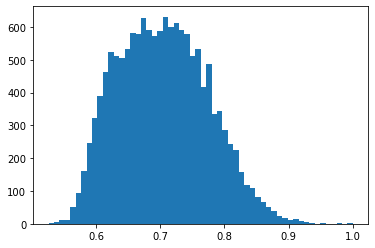

In [11]:
A = np.zeros_like(corr_data.values)
A_orig = corr_data.values + A_SNAP
A[:n,:n] = A_orig[n:,n:]
A[:n,n:] = A_orig[n:,:n]
A[n:,:n] = A_orig[:n,n:]
A[n:,n:] = A_orig[:n,:n]

print("Swapping over")
l,g = right_target_global_centrality_t(A, num_layers=2, target_tissue = 1, target_gene_indices = source_genes_indices, p=0.9)
plt.hist(g[:n], bins = 'auto')

[15154, 15402, 15633, 15989, 16156, 16334, 16380, 16544, 16556, 16871, 16919, 16984, 17019, 17102, 17281, 17288, 17390, 17636, 17638, 17821, 17889, 18070, 18121, 18307, 18479, 18671, 18714, 18814, 18877, 18925, 19027, 19152, 19260, 19293, 19526, 19683, 19865, 19931, 19948, 19978, 20153, 20423, 20532, 20746, 20877, 20887, 21119, 21410, 21429, 21456, 21484, 21505, 21772, 21856, 21978, 22073, 22142, 22441, 22453, 22544, 22591, 22633, 22865, 23205, 23223, 23290, 23397, 23624, 23701, 23717, 23720, 23751, 23847, 23999, 24066, 24090, 24143, 24151, 24175, 24189, 24208, 24220, 24294, 24351, 24366, 24443, 24508, 24562, 24567, 24604, 24654, 24703, 24816, 24892, 25189, 25234, 25442, 25537, 25727, 25739, 25841, 25870, 25964, 26109, 26163, 26176, 26220, 26275, 26319, 26368, 26461, 26468, 26550, 26704, 26901, 26908, 26938, 27034, 27359, 27362, 27372, 27374, 27386, 27431, 27504, 27518, 27543, 27571, 27687, 27692, 27778, 27847, 27857, 27875, 27908, 28010, 28034, 28050, 28071, 28102, 28145, 28230, 28343

(array([ 5., 17., 24., 36., 24., 17., 12.,  5.,  7.,  5.,  4.]),
 array([0.0031648 , 0.00316828, 0.00317175, 0.00317522, 0.0031787 ,
        0.00318217, 0.00318564, 0.00318912, 0.00319259, 0.00319606,
        0.00319954, 0.00320301]),
 <BarContainer object of 11 artists>)

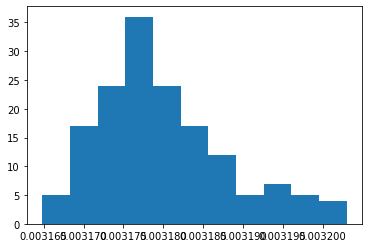

In [12]:
mapped_source_indices = [n+ind for ind in source_genes_indices]

print(mapped_source_indices)

plt.hist(l[mapped_source_indices], bins = 'auto')

In [13]:
#plt.hist(l[n:], bins = 'auto')

In [14]:
def plot_k_curve(genes, cen_vector, ground_truth_genes, filtered):
    secreted_proteins = list(pd.read_csv("../data/002790_proteins.csv", header=None).values)
    secreted_proteins = [s[0].upper() for s in secreted_proteins]
    order = cen_vector[:n].argsort()
    ranks = order.argsort()
    d = {'gene_name': genes, 'centrality': cen_vector[:n], 'rank': n-ranks}
    results = pd.DataFrame(data=d)
    results = results.sort_values(by=['centrality'], ascending=False)
    ranked_genes = results['gene_name'].tolist()
    
    filtered_results = results[results.gene_name.isin(secreted_proteins)]
    filtered_ranked_genes = filtered_results['gene_name'].tolist()
    
    if filtered:
        n_filtered = filtered_results.shape[0]
        k_range = np.arange(n_filtered)
        hits=np.zeros_like(k_range)
        current_hit_count = 0
        for i in k_range:
            if filtered_ranked_genes[i] in ground_truth_genes:
                current_hit_count = current_hit_count +1
            hits[i] = current_hit_count
        random_curve = np.cumsum(np.full((n_filtered,), hits[-1]/n_filtered))
        plot_variables = {'recall_at_k': hits, 'random_curve': random_curve}
        plot_df = pd.DataFrame(data=plot_variables)
        sns.lineplot(data=plot_df)    

    else:    
        k_range = np.arange(n)
        hits=np.zeros_like(k_range)
        current_hit_count = 0
        for i in k_range:
            if ranked_genes[i] in ground_truth_genes:
                current_hit_count = current_hit_count +1
            hits[i] = current_hit_count
        random_curve = np.cumsum(np.full((n,), hits[-1]/n))
        plot_variables = {'query-set centrality': hits, 'random_curve': random_curve}
        plot_df = pd.DataFrame(data=plot_variables)
        sns.lineplot(data=plot_df)    
        #plt.xlabel("Top k predictions", labelpad=1)
        #plt.ylabel("Recall at k", labelpad=1)
        plt.xticks(np.arange(0, 15001, 3500))
        plt.savefig("./insulin_responding_results_corr_SNAP.svg", dpi=300, fontsize=17, bbox_inches='tight')
        #plt.title("My Daily Step Count Tracked by Fitbit", y=1.02, fontsize=22);
        max_area = (current_hit_count * (current_hit_count + 1))/2 + ((n - current_hit_count)* current_hit_count)
        method_area = np.sum(hits)
        print("Area under curve is: ", (method_area/max_area)) 


    #get lncRNAs ranking
    lncRNAs = list(np.load("../data/paper/lncRNAs.npy"))
    lncRNA_results = results[results.gene_name.isin(lncRNAs)]
    lncRNA_ranked_genes = lncRNA_results['gene_name'].tolist()

    print(hits[-1])
    return (plot_df,results, filtered_results, lncRNA_results)

Area under curve is:  0.6844964481086827
215
(14459, 3)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error two minor releases later


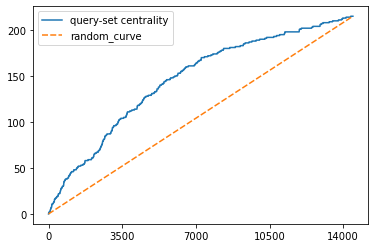

In [15]:
plot_df,results, filtered_results, lncRNA_results = plot_k_curve(genes, g, ground_truth_genes=common_target_genes, filtered=False)
print(results.shape)

In [16]:

lncRNA_results

,gene_name,centrality,rank
9699,ZEB1-AS1,0.858041,225
2129,TNK2-AS1,0.857204,235
12086,PWAR6,0.842282,390
6619,PRRT3-AS1,0.835216,491
7405,PRKCQ-AS1,0.828773,600
...,...,...,...
544,MIF-AS1,0.563187,14418
6528,LINC00857,0.562764,14421
6727,LINC00431,0.557769,14435
3075,CECR7,0.550507,14445


In [18]:
np.shape(genes)

(14459,)

In [19]:
hormone_name = "insulin"

In [20]:
lncRNA_results.to_csv("../data/paper/" + hormone_name + "_responding_lncRNA_results_corr_SNAP.csv")

filtered_results.to_csv("../data/paper/" + hormone_name + "_responding_fileterd_results_corr_SNAP_0.9.csv")

results.to_csv("../data/paper/" + hormone_name + "_responding_results_corr_SNAP_0.9.csv")